In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')
import random

In [2]:
def plotConfigurations(configurations):
    '''
    Can be used to plot your generated configurations in an animation.
    @param configurations: List of configurations, where each configuration
                           is a list/array of the 1D spin alignments.
    '''

    fig = plt.figure("Simulation 1D", figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.imshow(np.asarray(configurations).transpose(), interpolation='none', aspect='auto', origin='lower')
    ax.set_ylabel(r"x")
    ax.set_xlabel(r"Time")
    ax.set_xlim(0,None)
    fig.suptitle("Simulation")

    plt.show()

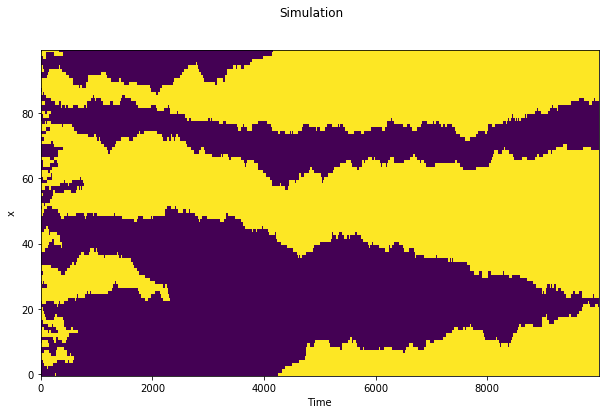

In [75]:
random.seed()
Nspins = 100
Nsteps = 100*Nspins
S = np.asarray([random.choice([-1,1]) for _ in range(Nspins)])
#S = np.ones((Nspins))
configurations = []

J = 1

def energy(config):
    return -J*np.sum(config*np.roll(config,1))

eold = energy(S)
kt = 0.1

for _ in range(Nsteps):
    trial = S.copy()
    flipindex = random.randint(0,Nspins-1)
    trial[flipindex] = trial[flipindex]*-1
    etrial = energy(trial)
    p = np.exp(-(etrial-eold)/kt)
    if random.random() <= p:
        S = trial
        eold = etrial
    
    configurations.append(S.copy())
    
plotConfigurations(configurations)
        
    
    #(eold = etrial)

In [26]:
S = np.roll(S,1)
S

array([ 1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,
        1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
       -1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1,
       -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1])

In [76]:
def plotConfigurations2D(configurations, interval=20):
    '''
    Can be used to plot your generated configurations in an animation.
    @param configurations: List of configurations, where each configuration
                           is a matrix of the 2D spin alignments.
    @param interval: Time in ms each configuration is show during the animation.
    '''
    fig = plt.figure("Initial condition", figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.imshow(configurations[0], interpolation='none', origin='lower')
    ax.set_xlabel(r"x")
    ax.set_ylabel(r"y")
    fig.suptitle("Initial condition")
    plt.show()
    
    fig = plt.figure("Final config", figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.imshow(configurations[-1], interpolation='none', origin='lower')
    ax.set_xlabel(r"x")
    ax.set_ylabel(r"y")
    fig.suptitle("Final config")
    plt.show()

    if len(configurations) > 1:
        figAni = plt.figure("Simulation", figsize=(6,6))
        axAni = figAni.add_subplot(111)
        im = axAni.imshow(configurations[0], interpolation='none', animated=True, origin='lower')
        axAni.set_xlabel(r"x")
        axAni.set_ylabel(r"y")
        figAni.suptitle("Simulation")

        def updatefig(i):
            print(i,end='\r')
            im.set_array(configurations[i])
            return im,

        ani = animation.FuncAnimation(figAni, updatefig, np.arange(1,len(configurations)), interval=interval)

    return ani

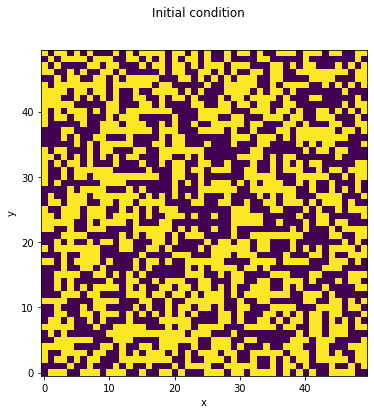

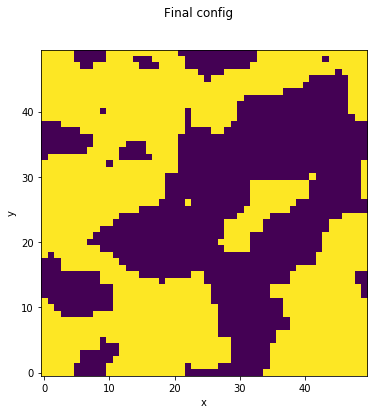

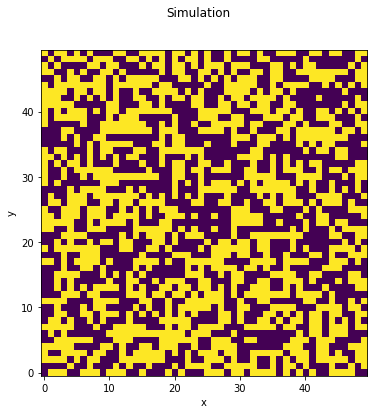

In [83]:
random.seed()
Nspins = 50
Nsteps = 10*Nspins**2
S = np.asarray([[random.choice([-1,1]) for _ in range(Nspins)] for _ in range(Nspins)])
#S = np.ones((Nspins))
configurations = []

J = 0.6

def energy2D(config):
    configx = np.roll(config,1,0)
    configy = np.roll(config,1,1)
    return -J*np.sum(config*configx+config*configy)
    #return -J*np.sum(config*np.roll(config,1))

eold = energy2D(S)
kt = 0.1

for n in range(Nsteps):
    trial = S.copy()
    flipi = random.randint(0,Nspins-1)
    flipj = random.randint(0,Nspins-1)
    trial[flipi,flipj] = trial[flipi,flipj]*-1
    etrial = energy2D(trial)
    p = np.exp(-(etrial-eold)/kt)
    if random.random() <= p:
        S = trial
        eold = etrial
    
    if n%Nspins == 0:
        configurations.append(S.copy())
    
plotConfigurations2D(configurations)
        
    